In [3]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

In [4]:
df = pd.read_csv(r"ayurvedic_remedies_multi_symptom.csv")

# Display first 5 rows
print(df.head())

   Cramps  Fatigue  Bloating  Anxiety  Headache  Mood Swings  Insomnia  \
0       1        0         1        1         0            1         0   
1       1        0         1        1         0            0         1   
2       1        0         0        0         0            1         0   
3       1        0         0        0         1            1         1   
4       1        1         0        0         1            0         1   

   Acid Reflux                                           Remedies  
0            0  Ajwain Water, Ashwagandha, Ginger Tea, Triphal...  
1            1  Ajwain Water, Ashwagandha, Ginger Tea, Triphal...  
2            0  Ajwain Water, Ashwagandha, Ginger Tea, Tulsi T...  
3            0  Ajwain Water, Ashwagandha, Ginger Tea, Tulsi T...  
4            0  Ajwain Water, Ashwagandha, Chia Seeds, Ginger ...  


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cramps       1500 non-null   int64 
 1   Fatigue      1500 non-null   int64 
 2   Bloating     1500 non-null   int64 
 3   Anxiety      1500 non-null   int64 
 4   Headache     1500 non-null   int64 
 5   Mood Swings  1500 non-null   int64 
 6   Insomnia     1500 non-null   int64 
 7   Acid Reflux  1500 non-null   int64 
 8   Remedies     1500 non-null   object
dtypes: int64(8), object(1)
memory usage: 105.6+ KB
None
            Cramps      Fatigue     Bloating      Anxiety     Headache  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.441333     0.428667     0.458000     0.433333     0.437333   
std       0.496712     0.495050     0.498399     0.495701     0.496223   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.0000

In [6]:
print(df.isnull().sum())

Cramps         0
Fatigue        0
Bloating       0
Anxiety        0
Headache       0
Mood Swings    0
Insomnia       0
Acid Reflux    0
Remedies       0
dtype: int64


In [7]:
remedy_to_id = {
    "Ajwain Water": 0,
    "Ashwagandha": 1,
    "Ginger Tea": 2,
    "Chia Seeds": 3,
    "Turmeric Milk": 4,
    "Triphala": 5,
    "Tulsi Tea": 6
}

# Function to map remedy names to numbers (safe version)
def encode_remedies(remedy_string):
    if pd.isna(remedy_string):  # handle NaNs
        return ""
    remedies = [r.strip() for r in remedy_string.split(",") if r.strip()]
    encoded = [str(remedy_to_id[r]) for r in remedies if r in remedy_to_id]
    return ", ".join(encoded)

# Apply the encoding
df["Remedies"] = df["Remedies"].apply(encode_remedies)

# Show result
print(df.head())


   Cramps  Fatigue  Bloating  Anxiety  Headache  Mood Swings  Insomnia  \
0       1        0         1        1         0            1         0   
1       1        0         1        1         0            0         1   
2       1        0         0        0         0            1         0   
3       1        0         0        0         1            1         1   
4       1        1         0        0         1            0         1   

   Acid Reflux          Remedies  
0            0  0, 1, 2, 5, 6, 4  
1            1  0, 1, 2, 5, 6, 4  
2            0     0, 1, 2, 6, 4  
3            0     0, 1, 2, 6, 4  
4            0  0, 1, 3, 2, 6, 4  


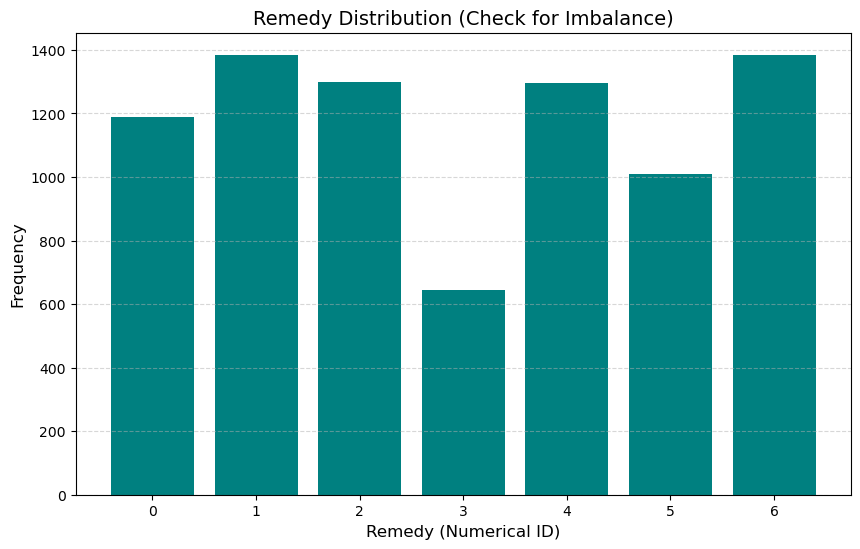

In [8]:
remedy_counts = Counter()
for remedies in df["Remedies"]:
    for r in remedies.split(","):
        remedy = r.strip()
        remedy_counts[remedy] += 1

# Sort and plot
labels, values = zip(*sorted(remedy_counts.items(), key=lambda x: int(x[0])))

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color="teal")
plt.title("Remedy Distribution (Check for Imbalance)", fontsize=14)
plt.xlabel("Remedy (Numerical ID)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [9]:
feature_columns = ['Cramps', 'Fatigue', 'Bloating', 'Anxiety', 'Headache',
                   'Mood Swings', 'Insomnia', 'Acid Reflux']

In [10]:
df["Remedies"] = df["Remedies"].apply(lambda x: [int(i.strip()) for i in x.split(",") if i.strip()])


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = pd.DataFrame(mlb.fit_transform(df["Remedies"]), columns=mlb.classes_)


In [12]:
print(y)

      0  1  2  3  4  5  6
0     1  1  1  0  1  1  1
1     1  1  1  0  1  1  1
2     1  1  1  0  1  0  1
3     1  1  1  0  1  0  1
4     1  1  1  1  1  0  1
...  .. .. .. .. .. .. ..
1495  1  1  1  1  1  1  1
1496  1  1  1  0  1  1  1
1497  1  1  1  1  1  1  1
1498  1  1  1  1  1  1  1
1499  0  1  0  0  1  0  1

[1500 rows x 7 columns]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

X = df[feature_columns]  # replace with your actual feature column names


In [14]:
!pip install scikit-multilearn
from skmultilearn.model_selection import iterative_train_test_split
import numpy as np

# Convert to numpy arrays
X_np = df[feature_columns].values
y_np =  y.values  # y must be a numpy array

# Perform stratified split
X_train, y_train, X_test, y_test = iterative_train_test_split(X_np, y_np, test_size=0.2)


In [15]:
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier())

In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score

# y_test = true labels, y_pred = predicted labels
accuracy = accuracy_score(y_test, y_pred)
print("Exact Match Accuracy:", accuracy)


Exact Match Accuracy: 1.0


In [18]:
# Inverse transform predictions and true labels to remedy names
predicted_remedies = mlb.inverse_transform(y_pred)
actual_remedies = mlb.inverse_transform(y_test)

# Display first 5 predictions
for i in range(5):
    print(f"Actual: {actual_remedies[i]}")
    print(f"Predicted: {predicted_remedies[i]}")
    print("---")


Actual: (0, 1, 2, 4, 5, 6)
Predicted: (0, 1, 2, 4, 5, 6)
---
Actual: (0, 1, 2, 4, 6)
Predicted: (0, 1, 2, 4, 6)
---
Actual: (0, 1, 2, 3, 4, 6)
Predicted: (0, 1, 2, 3, 4, 6)
---
Actual: (0, 1, 2, 3, 4, 5, 6)
Predicted: (0, 1, 2, 3, 4, 5, 6)
---
Actual: (1, 2, 6)
Predicted: (1, 2, 6)
---


In [19]:
from sklearn.metrics import accuracy_score, f1_score

# Training performance
y_pred_train = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Train F1 Score:", f1_score(y_train, y_pred_train, average='micro'))

# Test performance
y_pred_test = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test F1 Score:", f1_score(y_test, y_pred_test, average='micro'))


Train Accuracy: 1.0
Train F1 Score: 1.0
Test Accuracy: 1.0
Test F1 Score: 1.0


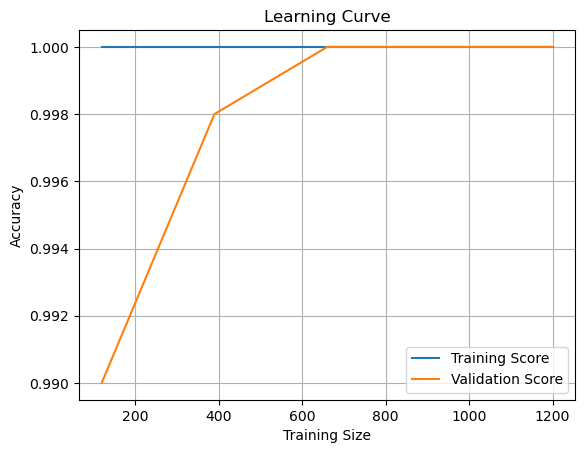

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", scores.mean())


Cross-Validation Accuracy:  1.0


In [22]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, multilabel_confusion_matrix
import numpy as np

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# F1 Score (micro: global performance, macro: average per label)
train_f1 = f1_score(y_train, y_train_pred, average='micro')
test_f1 = f1_score(y_test, y_test_pred, average='micro')

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Confusion Matrix for each label
print("\nMultilabel Confusion Matrices (Test Set):")
conf_matrices = multilabel_confusion_matrix(y_test, y_test_pred)

for i, label in enumerate(y.columns):
    print(f"\nConfusion Matrix for {label}:")
    print(conf_matrices[i])


Train Accuracy: 1.0000
Test Accuracy: 1.0000
Train F1 Score: 1.0000
Test F1 Score: 1.0000

Multilabel Confusion Matrices (Test Set):

Confusion Matrix for 0:
[[ 62   0]
 [  0 238]]

Confusion Matrix for 1:
[[ 23   0]
 [  0 277]]

Confusion Matrix for 2:
[[ 40   0]
 [  0 260]]

Confusion Matrix for 3:
[[171   0]
 [  0 129]]

Confusion Matrix for 4:
[[ 36   0]
 [  0 264]]

Confusion Matrix for 5:
[[104   0]
 [  0 196]]

Confusion Matrix for 6:
[[ 23   0]
 [  0 277]]


In [23]:
id_to_remedy = {
    0: "Ajwain Water",
    1: "Ashwagandha",
    2: "Ginger Tea",
    3: "Chia Seeds",
    4: "Turmeric Milk",
    5: "Triphala",
    6: "Tulsi Tea"
}

# Use remedy names in the report
target_names = [id_to_remedy[int(col)] for col in y.columns]
print(classification_report(y_test, y_test_pred, target_names=target_names))


               precision    recall  f1-score   support

 Ajwain Water       1.00      1.00      1.00       238
  Ashwagandha       1.00      1.00      1.00       277
   Ginger Tea       1.00      1.00      1.00       260
   Chia Seeds       1.00      1.00      1.00       129
Turmeric Milk       1.00      1.00      1.00       264
     Triphala       1.00      1.00      1.00       196
    Tulsi Tea       1.00      1.00      1.00       277

    micro avg       1.00      1.00      1.00      1641
    macro avg       1.00      1.00      1.00      1641
 weighted avg       1.00      1.00      1.00      1641
  samples avg       1.00      1.00      1.00      1641



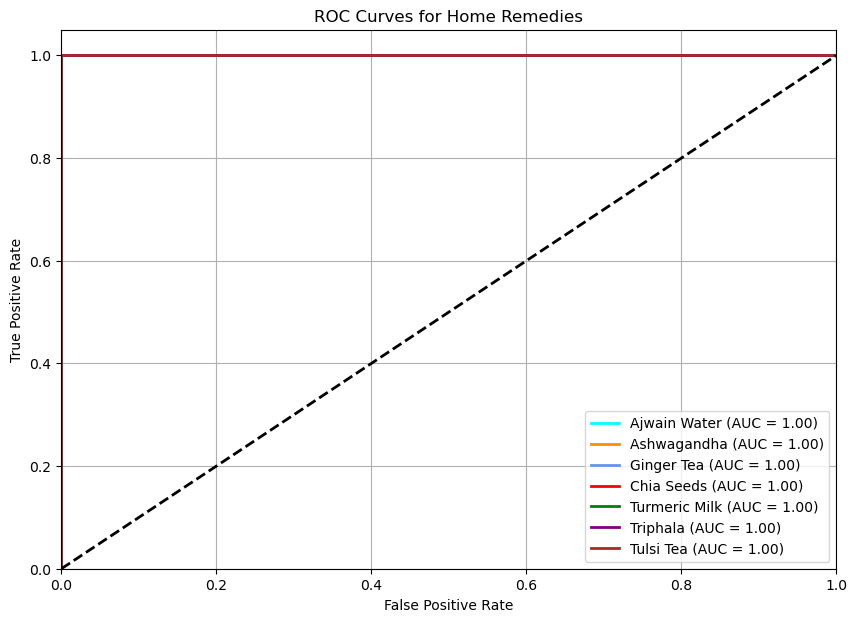

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Step 1: Get predicted probabilities for each label
y_score = model.predict_proba(X_test)

# Convert to array shape: [n_samples, n_classes]
y_score_array = np.array([proba[:, 1] for proba in y_score]).T

# Step 2: Remedy names (as you defined)
id_to_remedy = {
    0: "Ajwain Water",
    1: "Ashwagandha",
    2: "Ginger Tea",
    3: "Chia Seeds",
    4: "Turmeric Milk",
    5: "Triphala",
    6: "Tulsi Tea"
}
labels = [id_to_remedy[i] for i in range(len(id_to_remedy))]

# Step 3: Compute ROC curves and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown'])

plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Home Remedies')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, "recommendation-ayurvedic.pkl")
print(" Model saved as 'recommendation-ayurvedic.pkl'")
